In [2]:
!pip install scikit-plot

In [5]:
import cv2
import os
from PIL import Image
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image directory paths (modify as needed)
base_dir = 'datasets'
train_dir = os.path.join(base_dir, 'train')  # Assuming "train" folder has "yes" and "no" subfolders
test_dir = os.path.join(base_dir, 'test')   # Assuming "test" folder has "yes" and "no" subfolders

# Data augmentation for improved generalization (optional)
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Define generators for training and validation data (categorical classification)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'  # Two classes (yes/no)
)

validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Maintain order for evaluation
)

# Suppress potential UnicodeEncodeError (optional)
# import sys
# sys.stdout.reconfigure(encoding='utf-8')  # Set output encoding to UTF-8

# Define the CNN model architecture (using recommended input shape)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(2, activation='softmax'))  # Output layer with softmax for categorical classification

# Compile the model (consider class weights if your data is imbalanced)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (ensure all epochs run)
model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Save the trained model
model.save('brain_analysis.keras')

Found 253 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.4843 - loss: 0.7051 - val_accuracy: 0.5556 - val_loss: 0.5677
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.6264 - loss: 0.6680 - val_accuracy: 0.7778 - val_loss: 0.5006
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.7155 - loss: 0.5789 - val_accuracy: 0.8889 - val_loss: 0.3062
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7035 - loss: 0.5520 - val_accuracy: 1.0000 - val_loss: 0.4372
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6975 - loss: 0.5951 - val_accuracy: 0.8889 - val_loss: 0.3733
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.7011 - loss: 0.5712 - val_accuracy: 0.8889 - val_loss: 0.3974
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7577 - loss: 0.5269 - val_accuracy: 1.0000 - val_loss: 0.3032
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7188 - loss: 0.5581 - val_accuracy: 0.8889 - val_loss: 0.3147
Epo

In [7]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Maintain order for confusion matrix
)

# Get predictions and true labels
y_pred = model.predict(test_generator)
y_true = test_generator.classes

Found 9 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [8]:
accuracy = accuracy_score(y_true, y_pred.argmax(axis=1))
precision = precision_score(y_true, y_pred.argmax(axis=1))
recall = recall_score(y_true, y_pred.argmax(axis=1))
f1 = f1_score(y_true, y_pred.argmax(axis=1))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8888888888888888
Precision: 0.8333333333333334
Recall: 1.0
F1 Score: 0.9090909090909091


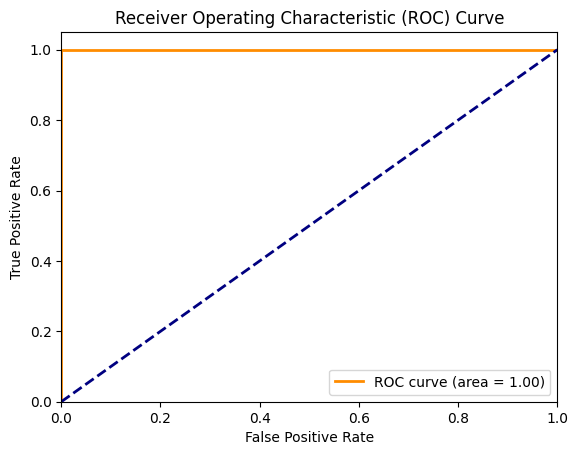

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):  # Assuming you have 2 classes
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
# Calculate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3 1]
 [0 5]]


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model('brain.keras')

# Define image directory path for the test data
test_dir = 'datasets/test'

# Data augmentation for improved generalization (optional)
datagen = ImageDataGenerator(rescale=1./255)

# Define generator for test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Maintain order for evaluation
)

# Get predictions on the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels for the test data
y_true = test_generator.classes

# Find misclassified images
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Visualize misclassified images
for index in misclassified_indices:
    img_path = os.path.join(test_dir, test_generator.filenames[index])
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    plt.imshow(img_array)
    plt.title(f'True Label: {test_generator.classes[index]}, Predicted Label: {y_pred_classes[index]}')
    plt.axis('off')
    plt.show()

Found 9 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

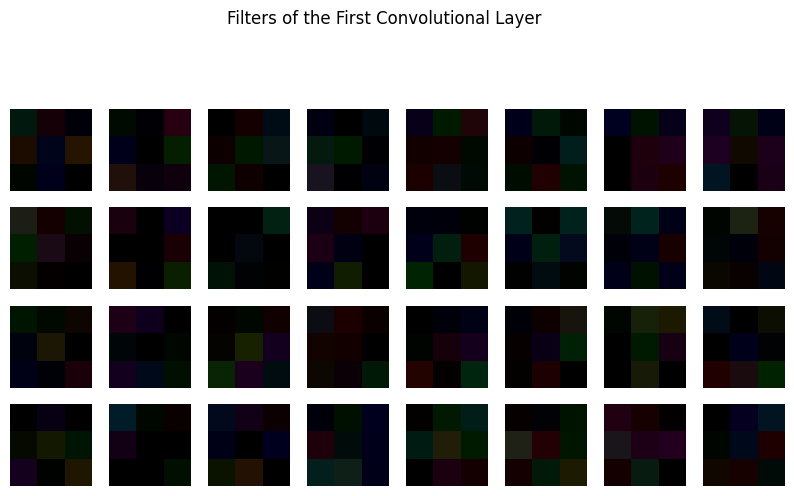

In [16]:
import matplotlib.pyplot as plt

# Extract the weights of the first convolutional layer
first_conv_layer_weights = model.layers[0].get_weights()[0]

# Visualize the filters (kernel weights) of the first convolutional layer
plt.figure(figsize=(10, 10))
for i in range(first_conv_layer_weights.shape[-1]):
    plt.subplot(8, 8, i+1)
    plt.imshow(first_conv_layer_weights[:, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Filters of the First Convolutional Layer')
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def generate_saliency_map(model, img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0  # Normalize pixel values

    # Call the model on some input data to initialize the layers
    _ = model.predict(x)

    # Compute gradients of the input picture with regard to the model's output
    grad_model = tf.keras.models.Model([model.inputs], [model.output, model.get_layer('conv2d').output])
    with tf.GradientTape() as tape:
        inputs = tf.cast(x, tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, np.argmax(predictions[0])]

    # Get the gradients
    grads = tape.gradient(loss, conv_outputs)[0]

    # Compute the guided gradients
    guided_grads = tf.cast(conv_outputs > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    # Compute the average gradients along the feature maps
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    # Generate the heat map
    cam = np.dot(conv_outputs[0], weights)

    # Resize the heat map to the size of the input image
    cam = cv2.resize(cam, (64, 64))

    # Normalize the heat map
    cam = np.maximum(cam, 0)
    cam /= cam.max()

    return cam

# Choose an image for generating the saliency map
img_path = 'uploads/pred7.jpg'  # Use forward slashes or double backslashes

# Load the trained model
model = tf.keras.models.load_model('brain.keras')

# Generate the saliency map
saliency_map = generate_saliency_map(model, img_path)

# Plot the original image and the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.load_img(img_path, target_size=(64, 64)))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='jet', alpha=0.5)
plt.title('Saliency Map')
plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


ValueError: The layer sequential has never been called and thus has no defined output.